In [146]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Capturando dados

In [147]:
dataset = pd.read_csv("vale3.csv")

### Criando a coluna do fechamento de amanhã

In [148]:
dataset[['close_tomorrow']] = dataset[['Price']].shift(-1)

### Removendo dados nulos

In [149]:
dataset = dataset.dropna(axis=0)

### Deixando o volume com dados flutuantes

In [150]:
volumes = []
for volume in dataset['Vol.']:
    if 'M' in volume:
        volume = float(volume.replace('M',''))*1000000
    elif 'K' in volume:
        volume = float(volume.replace('K',''))*1000
    volumes.append(volume)


### Convertendo a lista para um objeto Series para ser usado no model

In [151]:
dataset['Vol.'] = pd.Series(volumes)

In [152]:
dataset = dataset.dropna(axis=0)

### Definindo a nossa coluna target

In [153]:
y = dataset.close_tomorrow

### Definindo as nossas colunas de entrada

In [154]:
dataset_features = ['Price', 'Open','Vol.']

In [155]:
X = dataset[dataset_features]

### Separando o dataset entre treinamento e teste

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0) 

### Criando uma Árvore de decisão como modelo

In [157]:
vale_model = DecisionTreeRegressor(random_state=1)
#vale_model = RandomForestRegressor(random_state=1)

### Treinando o nosso modelo

In [158]:
vale_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### Fazendo predição com os dados de testes

In [159]:

print("The predictions are")
y_predicted = vale_model.predict(X_test)
print(y_predicted)


The predictions are
[ 2.99 12.94  8.27 ...  3.37 22.85 22.16]


### USando a métrica MAE para avaliar o modelo

In [160]:
print("MAE")
mae = mean_absolute_error(y_test, y_predicted)
print("Value:",mae)

MAE
Value: 0.2171463414634146


### Plotando o gráfico para ver a diferença entre a predição e o real

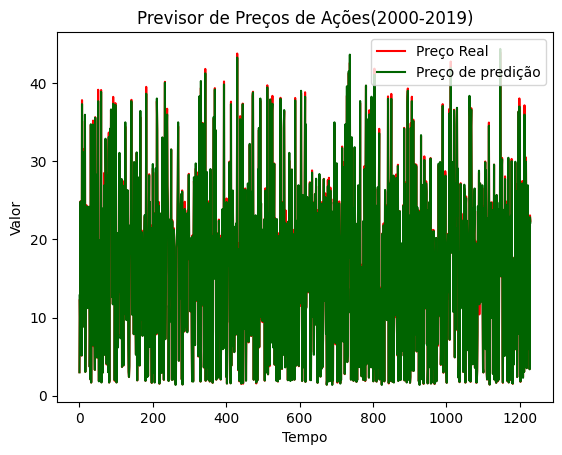

In [161]:
plt.plot(pd.array(y_test), color = 'red',label = 'Preço Real')
plt.plot(y_predicted, color = 'darkgreen', label="Preço de predição")
plt.title('Previsor de Preços de Ações(2000-2019)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()